**Import required libraries and scripts**

In [1]:
#Import required libraries and scripts
from scripts.library_preparation import *
from scripts.utilities import *
from scripts.docking_functions import *
from scripts.clustering_functions import *
from scripts.rescoring_functions import *
from scripts.ranking_functions import *
from scripts.performance_calculation import *
from scripts.get_pocket import *
from scripts.dogsitescorer import *
import numpy as np
import os

software = '/home/tony/CADD22/software'
protein_file = '/home/tony/CADD22/wocondock_main/2o1x_A_apo_protoss.pdb'
ref_file = '/home/tony/CADD22/wocondock_main/2o1x_A_lig_protoss.sdf'
docking_library = '/home/tony/CADD22/wocondock_main/500_of_FCHGroup_LeadLike.sdf'
docking_programs = ['SMINA','GNINA','PLANTS']
id_column = 'ID'
n_poses = 10
exhaustiveness = 4

#Initialise variables and create a temporary folder
w_dir = os.path.dirname(protein_file)
print('The working directory has been set to:', w_dir)
create_temp_folder(w_dir+'/temp')

[07:32:50] Initializing Normalizer


The working directory has been set to: /home/tony/CADD22/wocondock_main
The folder: /home/tony/CADD22/wocondock_main/temp already exists


In [ ]:
#Import required libraries and scripts
from scripts.library_preparation import *
from scripts.utilities import *
from scripts.docking_functions import *
from scripts.clustering_functions import *
from scripts.rescoring_functions import *
from scripts.ranking_functions import *
from scripts.performance_calculation import *
import numpy as np
import os

software = '/home/tony/CADD22/software'
protein_file = '/home/tony/CADD22/wocondock_test_1k/receptor_protoss_prepared.pdb'
ref_file = '/home/tony/CADD22/wocondock_test_1k/crystal_ligand_protoss.sdf'
docking_library = '/home/tony/CADD22/wocondock_test_1k/merged_actives_decoys.sdf'
docking_programs = ['SMINA','GNINA','PLANTS']
id_column = 'ID'
n_poses = 10
exhaustiveness = 4

#Initialise variables and create a temporary folder
w_dir = os.path.dirname(protein_file)
print('The working directory has been set to:', w_dir)
create_temp_folder(w_dir+'/temp')

In [ ]:
#Import required libraries and scripts
from scripts.library_preparation import *
from scripts.utilities import *
from scripts.docking_functions import *
from scripts.clustering_functions import *
from scripts.rescoring_functions import *
from scripts.ranking_functions import *
from scripts.performance_calculation import *
import numpy as np
import os

software = '/home/tony/CADD22/software'
protein_file = '/home/tony/CADD22/wocondock_performance_cdk2/receptor_protoss_prepared.pdb'
ref_file = '/home/tony/CADD22/wocondock_performance_cdk2/crystal_ligand_protoss.sdf'
docking_library = '/home/tony/CADD22/wocondock_performance_cdk2/merged_actives_decoys.sdf'
docking_programs = ['SMINA','GNINA','PLANTS']
id_column = 'ID'
n_poses = 10
exhaustiveness = 4

#Initialise variables and create a temporary folder
w_dir = os.path.dirname(protein_file)
print('The working directory has been set to:', w_dir)
create_temp_folder(w_dir+'/temp')

In [ ]:
pocket_definition = binding_site_coordinates_dogsitescorer(protein_file, w_dir, method='volume')

In [ ]:
cleaned_pkasolver_df = prepare_library(docking_library, id_column, software, 'pkasolver')

In [ ]:
all_poses = docking(protein_file, ref_file, software, docking_programs, exhaustiveness, n_poses)

In [ ]:
docking_splitted(w_dir, protein_file, ref_file, software, docking_programs, exhaustiveness, n_poses)

In [ ]:
split_sdf(w_dir, '/home/tony/CADD22/wocondock_performance_cdk2/temp/allposes.sdf')

In [ ]:
read_sdf_nomols = PandasTools.LoadSDF('/home/tony/CADD22/wocondock_performance_cdk2/temp/allposes.sdf', idName='Pose ID', molColName=None)

In [ ]:
read_sdf_mols = PandasTools.LoadSDF('/home/tony/CADD22/wocondock_performance_cdk2/temp/allposes.sdf', idName='Pose ID', molColName='Molecule')

In [ ]:
all_poses = fetch_poses(protein_file, n_poses)

In [ ]:
cluster('espsim', w_dir, protein_file)
cluster('spyRMSD', w_dir, protein_file)
cluster('USRCAT', w_dir, protein_file)
cluster('RMSD', w_dir, protein_file)
cluster('3DScore', w_dir, protein_file)

In [ ]:
cluster_numpy('espsim', w_dir, protein_file)
cluster_numpy('spyRMSD', w_dir, protein_file)
cluster_numpy('USRCAT', w_dir, protein_file)
cluster_numpy('RMSD', w_dir, protein_file)
cluster_numpy('3DScore', w_dir, protein_file)

In [ ]:
cluster_numpy_futures('espsim', w_dir, protein_file)
cluster_numpy_futures('spyRMSD', w_dir, protein_file)
cluster_numpy_futures('USRCAT', w_dir, protein_file)
cluster_numpy_futures('RMSD', w_dir, protein_file)
cluster_numpy_futures('3DScore', w_dir, protein_file)
cluster_numpy_futures('bestpose', w_dir, protein_file)

**Rescoring**

The file containing all the cluster centers is then rescored using all scoring functions available (GNINA, Vina, AutoDock4, PLP, CHEMPLP, RF-Score-VS). The rescored output is return as a dataframe.

In [ ]:
RMSD_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/RMSD_clustered.sdf')
espsim_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/espsim_clustered.sdf')
spyRMSD_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/spyRMSD_clustered.sdf')
USRCAT_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/USRCAT_clustered.sdf')
DScore_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/3DScore_clustered.sdf')
bestpose_rescored = rescore_all(w_dir, protein_file, ref_file, software, w_dir+'/temp/clustering/bestpose_clustered.sdf')

**Final ranking methods**

This code calculates the final ranking of compounds using various methods.
*Method 1* : Calculates ECR value for each cluster center, then outputs the top ranked center.
*Method 2* : Calculates ECR value for each cluster center, then outputs the average ECR value for each compound.
*Method 3* : Calculates the average rank of each compound, then ouputs the corresponding ECR value for each compound.
*Method 6* : Calculates Z-score for each cluster center, then ouputs the top ranked center.
*Method 7* : Calculates Z-score for each cluster center, then ouputs the average Z-score for each compound.

All methods are then combined into a single dataframe for comparison purposes.

In [ ]:
apply_ranking_methods_simplified(w_dir)

In [ ]:
calculate_EFs(w_dir, docking_library)

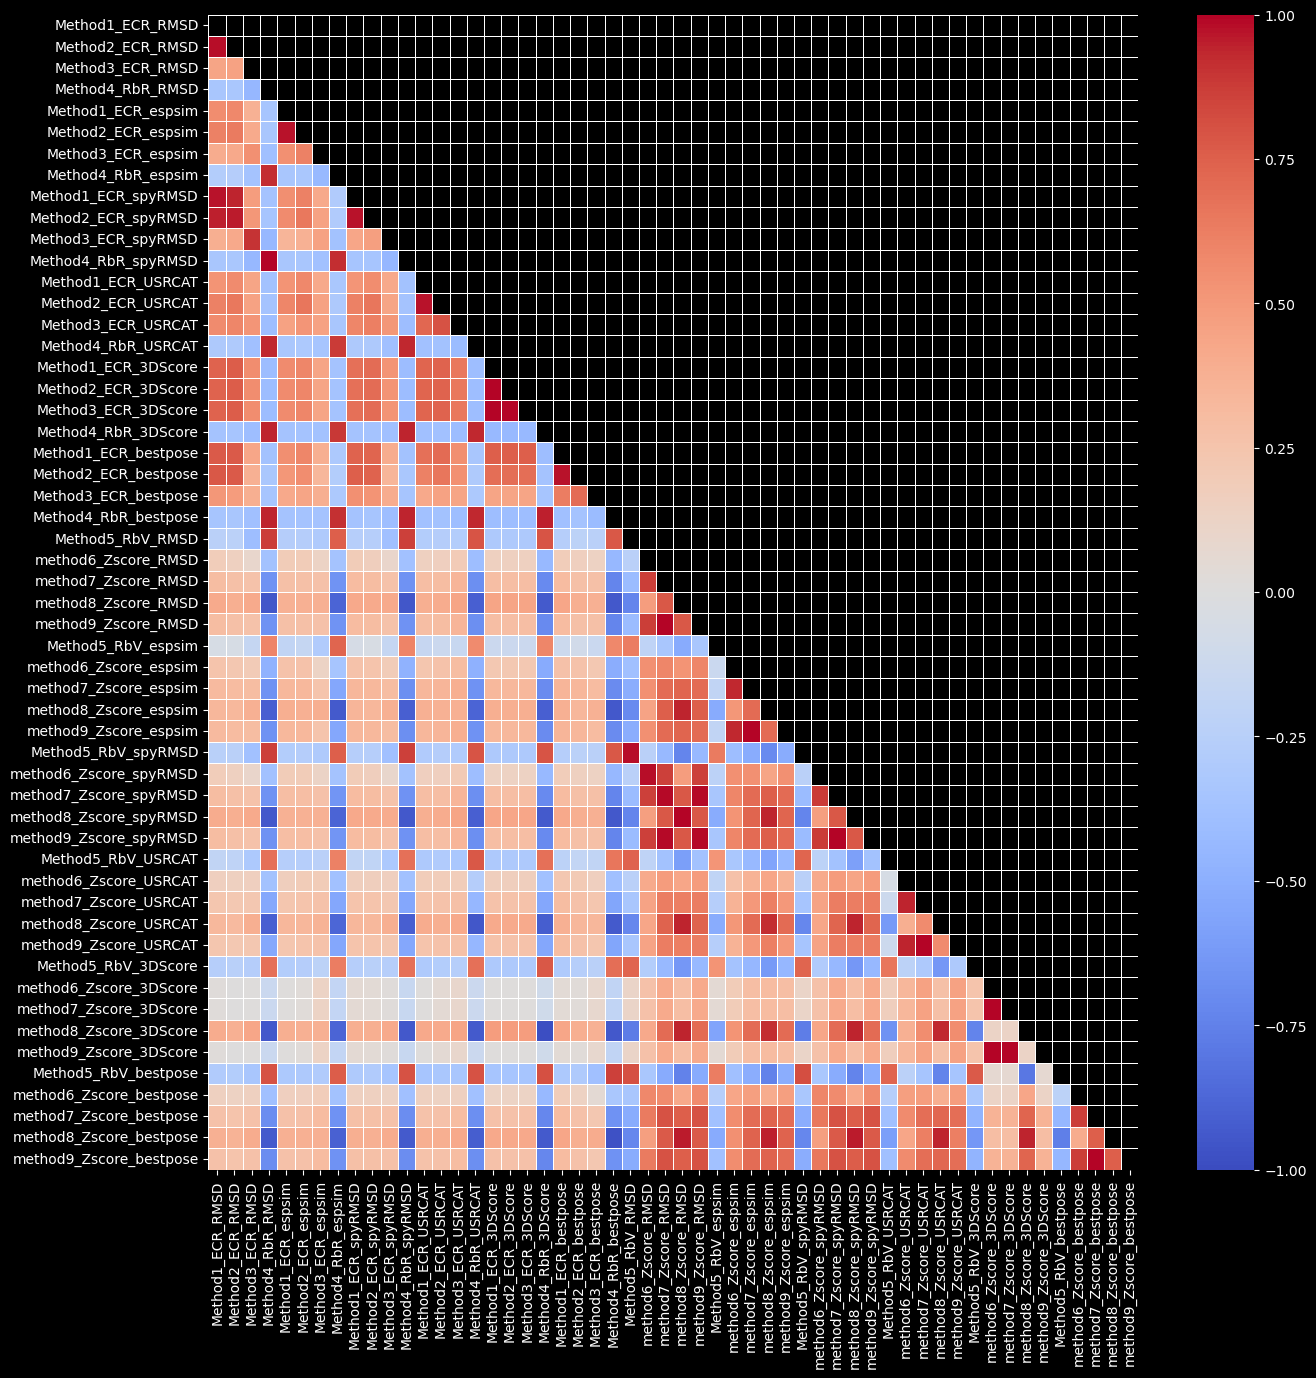

In [2]:
show_correlation('/home/tony/CADD22/wocondock_main/temp/ranking/method_results.csv')